In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import requests
from citipy import citipy 
import time 
from datetime import datetime
from config import weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 
coordinates 

[(-5.0310335586377875, 129.8063352862182),
 (55.842320611911674, 159.5695169304703),
 (-19.02361580272546, 3.2291106127846945),
 (-57.36417049808717, 23.737210337374023),
 (-38.23881865897476, 90.40002726589887),
 (-31.514602522410847, -30.453899521658172),
 (-84.01532830112808, 106.65081060531674),
 (60.69277780939731, -26.99576908123521),
 (-53.38862742925041, -8.15612166835254),
 (-32.56825423210827, 2.19350209782786),
 (-69.43985953133517, -4.596071779387444),
 (36.99587837707327, 36.98215763479473),
 (-18.308856223370654, 124.57002223822974),
 (-83.51142281165852, -23.883484554362184),
 (-80.92920736234288, -74.47435147385522),
 (-36.919304845608835, -163.04070800595952),
 (53.82254560303946, 71.27598784110532),
 (78.03907899398007, -6.977140123454035),
 (60.71749023437613, -162.00464491939942),
 (68.48896639950149, -140.16100992990917),
 (-11.999910125353495, -124.21038520792814),
 (5.469563464411209, 93.17702621766773),
 (-15.644952771771486, -165.2125374321255),
 (-29.107740660

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities) 

620

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [9]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | amahai
Processing Record 2 of Set 13 | esso
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | bredasdorp
Processing Record 5 of Set 13 | busselton
Processing Record 6 of Set 13 | arraial do cabo
Processing Record 7 of Set 13 | albany
Processing Record 8 of Set 13 | olafsvik
Processing Record 9 of Set 13 | cape town
Processing Record 10 of Set 13 | luderitz
Processing Record 11 of Set 13 | kilis
Processing Record 12 of Set 13 | broome
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | avarua
Processing Record 15 of Set 13 | poltavka
Processing Record 16 of Set 13 | klaksvik
Processing Record 17 of Set 13 | bethel
Processing Record 18 of Set 13 | aklavik
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | banda aceh
Processing Record 21 of Set 13 | alofi
Processing Record 22 of Set 13 | rikitea
Processing Record 23 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 24 of S

Processing Record 36 of Set 16 | nanortalik
Processing Record 37 of Set 16 | ivybridge
Processing Record 38 of Set 16 | vao
Processing Record 39 of Set 16 | kupang
Processing Record 40 of Set 16 | jizan
Processing Record 41 of Set 16 | guerrero negro
Processing Record 42 of Set 16 | college
Processing Record 43 of Set 16 | hogyesz
Processing Record 44 of Set 16 | west helena
Processing Record 45 of Set 16 | lorengau
Processing Record 46 of Set 16 | estelle
Processing Record 47 of Set 16 | rio grande
Processing Record 48 of Set 16 | saint-philippe
Processing Record 49 of Set 16 | galesong
Processing Record 50 of Set 16 | tual
Processing Record 1 of Set 17 | roald
Processing Record 2 of Set 17 | leningradskiy
Processing Record 3 of Set 17 | byron bay
Processing Record 4 of Set 17 | bud
Processing Record 5 of Set 17 | douentza
Processing Record 6 of Set 17 | karratha
Processing Record 7 of Set 17 | la paz
Processing Record 8 of Set 17 | baykit
Processing Record 9 of Set 17 | andenes
Proce

Processing Record 19 of Set 20 | kodinsk
Processing Record 20 of Set 20 | hervey bay
Processing Record 21 of Set 20 | natitingou
Processing Record 22 of Set 20 | alashtar
City not found. Skipping...
Processing Record 23 of Set 20 | pijijiapan
Processing Record 24 of Set 20 | berlevag
Processing Record 25 of Set 20 | necochea
Processing Record 26 of Set 20 | neryungri
Processing Record 27 of Set 20 | ranfurly
Processing Record 28 of Set 20 | labutta
City not found. Skipping...
Processing Record 29 of Set 20 | ossora
Processing Record 30 of Set 20 | batavia
Processing Record 31 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 32 of Set 20 | aranos
Processing Record 33 of Set 20 | darnah
Processing Record 34 of Set 20 | shache
Processing Record 35 of Set 20 | coahuayana
Processing Record 36 of Set 20 | bathsheba
Processing Record 37 of Set 20 | barbar
City not found. Skipping...
Processing Record 38 of Set 20 | sterling
Processing Record 39 of Set 20 | sivas
Processing R

Processing Record 7 of Set 24 | tucuma
Processing Record 8 of Set 24 | tatawin
Processing Record 9 of Set 24 | ararangua
Processing Record 10 of Set 24 | saleaula
City not found. Skipping...
Processing Record 11 of Set 24 | krasnoselkup
Processing Record 12 of Set 24 | optasi
Processing Record 13 of Set 24 | novopokrovka
Processing Record 14 of Set 24 | scottsboro
Processing Record 15 of Set 24 | cumberland
Processing Record 16 of Set 24 | shingu
Processing Record 17 of Set 24 | makinsk
Processing Record 18 of Set 24 | yumen
Processing Record 19 of Set 24 | new castle
Processing Record 20 of Set 24 | bandarbeyla
Processing Record 21 of Set 24 | muswellbrook
Processing Record 22 of Set 24 | somerset east
Processing Record 23 of Set 24 | osakarovka
Processing Record 24 of Set 24 | tateyama
Processing Record 25 of Set 24 | quelimane
Processing Record 26 of Set 24 | czestochowa
Processing Record 27 of Set 24 | belaya gora
Processing Record 28 of Set 24 | birmitrapur
Processing Record 29 of

In [12]:
len(city_data) 

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amahai,-3.33,128.92,84.00,88,93,4.23,ID,2020-11-27 17:28:44
1,Esso,55.93,158.70,5.86,88,96,3.00,RU,2020-11-27 17:28:44
2,Jamestown,42.10,-79.24,46.00,75,90,11.41,US,2020-11-27 17:28:44
3,Bredasdorp,-34.53,20.04,64.40,68,96,20.80,ZA,2020-11-27 17:28:45
4,Busselton,-33.65,115.33,46.99,94,0,9.17,AU,2020-11-27 17:28:45
5,Arraial Do Cabo,-22.97,-42.03,86.00,65,0,21.92,BR,2020-11-27 17:28:45
6,Albany,42.60,-73.97,51.01,69,68,6.29,US,2020-11-27 17:27:08
7,Olafsvik,64.89,-23.71,34.41,83,94,37.63,IS,2020-11-27 17:28:45
8,Cape Town,-33.93,18.42,73.40,43,0,13.87,ZA,2020-11-27 17:24:43
9,Luderitz,-26.65,15.16,64.40,77,0,23.04,NA,2020-11-27 17:28:45


In [14]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'] 
city_data_df = city_data_df[city_data_reordered] 
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amahai,ID,2020-11-27 17:28:44,-3.33,128.92,84.00,88,93,4.23
1,Esso,RU,2020-11-27 17:28:44,55.93,158.70,5.86,88,96,3.00
2,Jamestown,US,2020-11-27 17:28:44,42.10,-79.24,46.00,75,90,11.41
3,Bredasdorp,ZA,2020-11-27 17:28:45,-34.53,20.04,64.40,68,96,20.80
4,Busselton,AU,2020-11-27 17:28:45,-33.65,115.33,46.99,94,0,9.17
...,...,...,...,...,...,...,...,...,...
566,Kisanga,TZ,2020-11-27 17:29:57,-7.44,37.70,81.21,66,5,7.02
567,Lasa,IT,2020-11-27 17:29:57,46.62,10.70,36.00,65,5,1.30
568,Rafraf,TN,2020-11-27 17:29:58,37.19,10.18,64.40,88,40,13.87
569,Yulara,AU,2020-11-27 17:29:58,-25.24,130.99,77.00,25,40,2.13


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [16]:
#6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"] 

In [17]:
# Get today's date in seconds.
today = time.time()
today 

1606498198.3669918

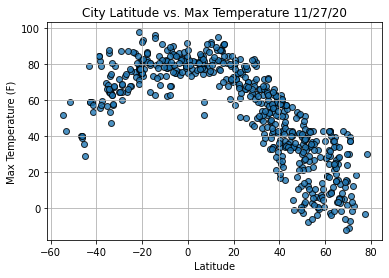

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show() 

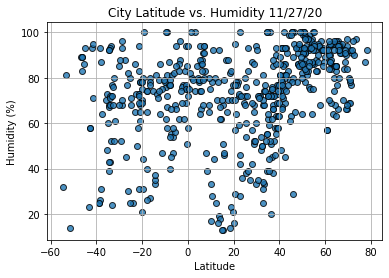

In [19]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show() 

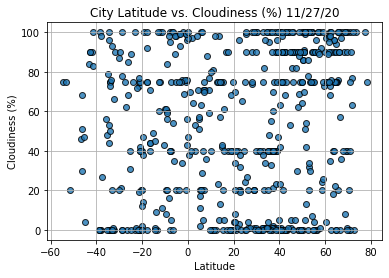

In [20]:
#6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show() 

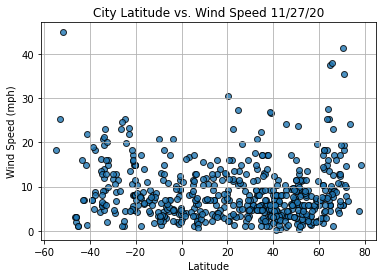

In [21]:
#6.3.4
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show() 

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [25]:
index13 = city_data_df.loc[13] 
index13 

City                       Avarua
Country                        CK
Date          2020-11-27 17:28:46
Lat                        -21.21
Lng                       -159.78
Max Temp                     75.2
Humidity                       83
Cloudiness                     73
Wind Speed                   8.05
Name: 13, dtype: object

In [26]:
city_data_df['Lat'] >= 0 

0      False
1       True
2       True
3      False
4      False
       ...  
566    False
567     True
568     True
569    False
570    False
Name: Lat, Length: 571, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head() 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Esso,RU,2020-11-27 17:28:44,55.93,158.70,5.86,88,96,3.00
2,Jamestown,US,2020-11-27 17:28:44,42.10,-79.24,46.00,75,90,11.41
6,Albany,US,2020-11-27 17:27:08,42.60,-73.97,51.01,69,68,6.29
7,Olafsvik,IS,2020-11-27 17:28:45,64.89,-23.71,34.41,83,94,37.63
10,Kilis,TR,2020-11-27 17:24:32,36.72,37.12,41.00,75,0,4.70


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

In [31]:
northern_hemi_df.head() 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Esso,RU,2020-11-27 17:28:44,55.93,158.70,5.86,88,96,3.00
2,Jamestown,US,2020-11-27 17:28:44,42.10,-79.24,46.00,75,90,11.41
6,Albany,US,2020-11-27 17:27:08,42.60,-73.97,51.01,69,68,6.29
7,Olafsvik,IS,2020-11-27 17:28:45,64.89,-23.71,34.41,83,94,37.63
10,Kilis,TR,2020-11-27 17:24:32,36.72,37.12,41.00,75,0,4.70


In [33]:
southern_hemi_df.head() 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amahai,ID,2020-11-27 17:28:44,-3.33,128.92,84.00,88,93,4.23
3,Bredasdorp,ZA,2020-11-27 17:28:45,-34.53,20.04,64.40,68,96,20.80
4,Busselton,AU,2020-11-27 17:28:45,-33.65,115.33,46.99,94,0,9.17
5,Arraial Do Cabo,BR,2020-11-27 17:28:45,-22.97,-42.03,86.00,65,0,21.92
8,Cape Town,ZA,2020-11-27 17:24:43,-33.93,18.42,73.40,43,0,13.87


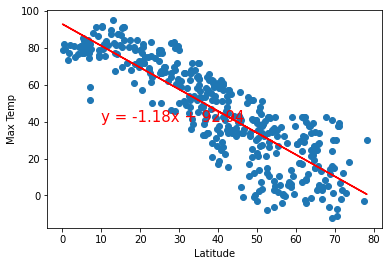

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40)) 

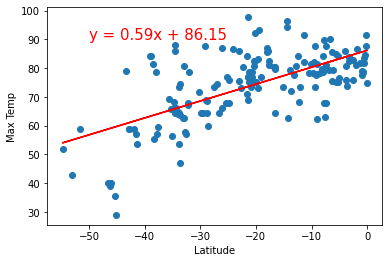

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90)) 

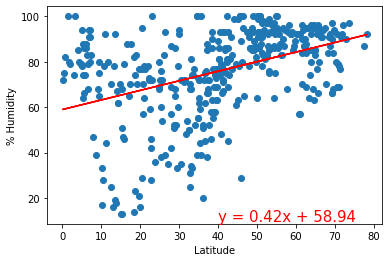

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10)) 

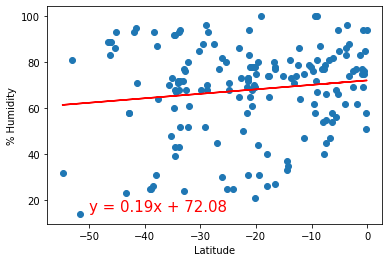

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15)) 

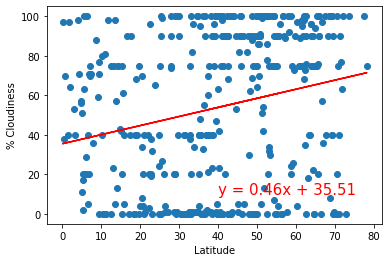

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10)) 

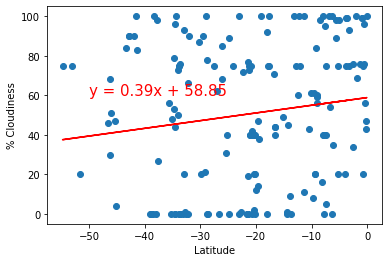

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60)) 

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ 
                        for Wind Speed', 'Wind Speed',(40,35)) 

SyntaxError: EOL while scanning string literal (<ipython-input-46-697908017ee4>, line 6)

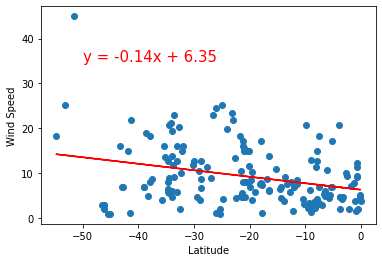

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35)) 